Este exercício é parte do curso: https://www.udemy.com/course/estatistica-para-ciencia-de-dados-machine-learning/

# Classificação com dados desbalanceados

## Carregamento da base de dados

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [3]:
dataset.shape

(5806, 75)

In [4]:
dataset.head(30)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
7,72,0,N,4.834130,0.3,0,2.994083,0.5,0,4.804655,...,0.705489,0.662750,0.719276,0.619855,0.678977,0.763664,0.715188,0.672697,0.817781,Ruim
8,68,0,N,4.583227,0.5,0,3.766229,0.5,1,4.768499,...,0.763725,0.677878,0.737148,0.649325,0.666209,0.769503,0.754634,0.690733,0.818703,Bom
9,142,0,N,4.867134,0.3,0,3.122022,0.5,1,4.700549,...,0.741146,0.643844,0.690222,0.635208,0.619500,0.766466,0.694922,0.673925,0.822170,Bom
10,48,0,N,5.320103,0.5,0,2.779621,0.5,0,5.357514,...,0.753940,0.655293,0.721071,0.663534,0.649143,0.762069,0.662349,0.655148,0.826317,Bom
11,96,0,N,4.593392,0.5,0,3.241813,0.5,0,4.739491,...,0.755873,0.602638,0.708592,0.666241,0.640240,0.772720,0.707340,0.675449,0.812079,Bom


In [5]:
dataset['blacklist'] = dataset['blacklist'] == 'S'

/home/lucas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


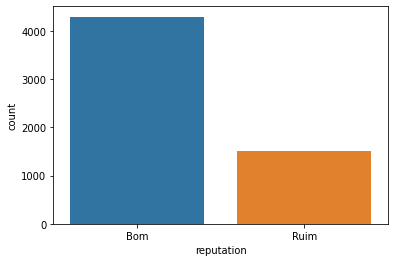

In [6]:
import seaborn as sns
sns.countplot(dataset['reputation']);

In [7]:
len(dataset.columns)

75

In [8]:
X = dataset.iloc[:,0:74].values

In [9]:
X.shape

(5806, 74)

In [10]:
X

array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [11]:
y = dataset.iloc[:,74].values

In [12]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [13]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

## Base de treinamento e teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [16]:
X_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [17]:
X_teste.shape, y_teste.shape

((1162, 74), (1162,))

## Classificação com Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [20]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7478485370051635

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [21]:
!pip install imblearn
from imblearn.under_sampling import TomekLinks

In [22]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [23]:
X_under.shape, y_under.shape

((5417, 74), (5417,))

In [24]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [25]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [26]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, 
                                                                          test_size = 0.2, stratify = y_under)
X_treinamento_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [27]:
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.7287822878228782

## Sobreamostragem (oversampling) - SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [30]:
X_over.shape, y_over.shape

((8598, 74), (8598,))

In [31]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [32]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [33]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, 
                                                                          test_size = 0.2, stratify = y_over)
X_treinamento_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [34]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8203488372093023